In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset=pd.read_csv("E:\pythonbasics\Churn_Modelling.csv")

In [3]:
dataset


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,NaN,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,NaN,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699.0,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850.0,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771.0,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516.0,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709.0,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772.0,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
dataset.isnull().any()


RowNumber          False
CustomerId         False
Surname            False
CreditScore         True
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [5]:
dataset.fillna(dataset['CreditScore'].mean(),inplace=True)

In [6]:
dataset.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset['Geography']=le.fit_transform(dataset['Geography'])

In [8]:
dataset['Gender']=le.fit_transform(dataset['Gender'])

In [9]:
dataset


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.00000,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,650.54791,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,650.54791,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699.00000,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850.00000,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771.00000,0,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516.00000,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709.00000,0,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772.00000,1,1,42,3,75075.31,2,1,0,92888.52,1


In [10]:
x=dataset.iloc[:,3:13].values
y=dataset.iloc[:,13].values

In [11]:
from sklearn.preprocessing import OneHotEncoder
one=OneHotEncoder()
z=one.fit_transform(x[:,1:2]).toarray()
x=np.delete(x ,1,axis=1)
x=np.concatenate((z,x),axis=1)  

In [12]:
x

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [13]:
france=1,0,0
spain=0,0,1
germany=0,1,0


france=0,0
spain=0,1
germany=1,0

In [14]:
x.shape

(10000, 12)

In [15]:
x=x[:,1:]

In [16]:
x.shape

(10000, 11)

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [18]:
x_train.shape

(8000, 11)

In [19]:
y_test.shape

(2000,)

In [20]:
x_test.shape

(2000, 11)

In [21]:
y_train.shape

(8000,)

In [22]:
 from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
 x_test=sc.transform(x_test)

In [23]:
x_train

array([[-0.5698444 ,  1.74309049,  0.16936238, ...,  0.64259497,
        -1.03227043,  1.10643166],
       [ 1.75486502, -0.57369368, -2.30517139, ...,  0.64259497,
         0.9687384 , -0.74866447],
       [-0.5698444 , -0.57369368, -1.1916312 , ...,  0.64259497,
        -1.03227043,  1.48533467],
       ...,
       [-0.5698444 , -0.57369368,  0.90141196, ...,  0.64259497,
        -1.03227043,  1.41231994],
       [-0.5698444 ,  1.74309049, -0.62455054, ...,  0.64259497,
         0.9687384 ,  0.84432121],
       [ 1.75486502, -0.57369368, -0.28430214, ...,  0.64259497,
        -1.03227043,  0.32472465]])

In [24]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.
C:\Users\HOME\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\HOME\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\HOME\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\HOME\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519

In [25]:
classifer= Sequential()

In [26]:
classifer.add(Dense(units=11,init='uniform',activation='relu'))

C:\Users\HOME\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=11, activation="relu", kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


In [27]:
classifer.add(Dense(units=6,init='uniform',activation='relu'))

C:\Users\HOME\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=6, activation="relu", kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


In [28]:
classifer.add(Dense(units=1,init='uniform',activation='sigmoid'))

C:\Users\HOME\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, activation="sigmoid", kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


In [29]:
classifer.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [30]:
classifer.fit(x_train,y_train,batch_size=16,epochs=100)




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/100
8000/8000 [==============================] - 1s 174us/step - loss: 0.4975 - acc: 0.7960
Epoch 2/100
8000/8000 [==============================] - 1s 121us/step - loss: 0.4294 - acc: 0.7960
Epoch 3/100
8000/8000 [==============================] - 1s 126us/step - loss: 0.4238 - acc: 0.7960
Epoch 4/100
8000/8000 [==============================] - 1s 125us/step - loss: 0.4194 - acc: 0.8139
Epoch 5/100
8000/8000 [==============================] - 1s 122us/step - loss: 0.4168 - acc: 0.8231
Epoch 6/100
8000/8000 [==============================] - 1s 124us/step - loss: 0.4152 - acc: 0.8271
Epoch 7/100
8000/8000 [==============================] - 1s 124us/step - loss: 0.4136 - acc: 0.8289
Epoch 8/100
8000/8000 [==============================] - 1s 121us/step - loss: 0.4120 - acc: 0.8304
Epoch 9/100
8000/8000 [==============================] - 1s 123us/step - loss: 0.4110 - acc: 0.8324
Ep

8000/8000 [==============================] - 1s 167us/step - loss: 0.3992 - acc: 0.8366
Epoch 72/100
8000/8000 [==============================] - 1s 157us/step - loss: 0.3989 - acc: 0.8367
Epoch 73/100
8000/8000 [==============================] - 2s 237us/step - loss: 0.3988 - acc: 0.8385
Epoch 74/100
8000/8000 [==============================] - 2s 198us/step - loss: 0.3990 - acc: 0.8384
Epoch 75/100
8000/8000 [==============================] - 2s 244us/step - loss: 0.3985 - acc: 0.8350
Epoch 76/100
8000/8000 [==============================] - 2s 244us/step - loss: 0.3987 - acc: 0.8367
Epoch 77/100
8000/8000 [==============================] - 2s 246us/step - loss: 0.3991 - acc: 0.8352
Epoch 78/100
8000/8000 [==============================] - 2s 240us/step - loss: 0.3987 - acc: 0.8361
Epoch 79/100
8000/8000 [==============================] - 1s 179us/step - loss: 0.3989 - acc: 0.8367
Epoch 80/100
8000/8000 [==============================] - 1s 172us/step - loss: 0.3987 - acc: 0.8375
Epo

In [31]:
x_test

array([[ 1.75486502, -0.57369368, -0.55237664, ...,  0.64259497,
         0.9687384 ,  1.61085707],
       [-0.5698444 , -0.57369368, -1.31535788, ...,  0.64259497,
        -1.03227043,  0.49587037],
       [-0.5698444 ,  1.74309049,  0.57147412, ...,  0.64259497,
         0.9687384 , -0.42478674],
       ...,
       [-0.5698444 ,  1.74309049, -0.74827723, ...,  0.64259497,
        -1.03227043,  0.71888467],
       [ 1.75486502, -0.57369368, -0.00591709, ...,  0.64259497,
         0.9687384 , -1.54507805],
       [ 1.75486502, -0.57369368, -0.79983001, ...,  0.64259497,
        -1.03227043,  1.61255917]])

In [32]:
y_pred=classifer.predict(x_test)

In [33]:
y_pred=(y_pred>0.5)

In [52]:
y_pred[1]

array([False])

In [53]:
y_pred.shape

(2000, 1)

In [51]:
y_test[30]

0

In [37]:
y_test

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [59]:
y_p = classifer.predict(sc.transform(np.array([[1,0,75,0,25,0,2,400000,4,1,1]])))

In [ ]:
y_p

In [60]:
y_p=y_p>0.5

In [62]:
y_p

array([[0.08622033]], dtype=float32)

In [63]:
y_p = classifer.predict(sc.transform(np.array([[0,0,75,0,25,2,40000,4,1,1,50000]])))


In [64]:
y_p

array([[0.02925659]], dtype=float32)

In [41]:
from sklearn.metrics import accuracy_score
a=accuracy_score(y_pred,y_test)

In [57]:
a

0.844

In [58]:
classifer.save("churn1.h5")

In [43]:
from sklearn.metrics import confusion_matrix # it is only  for categorical target variables
cm=confusion_matrix(y_test,y_pred)

In [44]:
cm

array([[1540,   55],
       [ 257,  148]], dtype=int64)

In [45]:
tpr=1549/(1549+46) #tpr

In [46]:
tpr

0.9711598746081505

In [47]:
fpr=261/(144+261)

In [48]:
fpr

0.6444444444444445

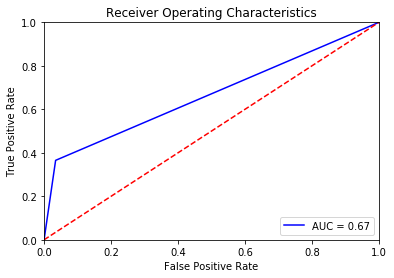

In [49]:
 import sklearn.metrics as metrics
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred)
roc_auc=metrics.auc(fpr,tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristics')
plt.plot(fpr,tpr,'b',label='AUC = %0.2f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

specificity=TN/TN+FP
